# DAY 13

## [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

## [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train.DAYS_BIRTH = abs(app_train.DAYS_BIRTH)

C:\Users\Ychu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64


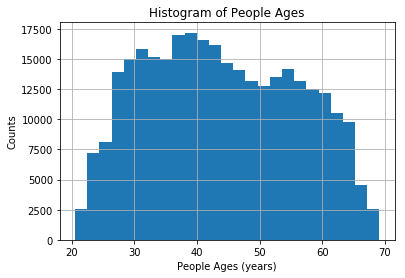

In [5]:
# Create sub_df with ['TARGET', 'DAYS_BIRTH']
sub_df = app_train[['TARGET', 'DAYS_BIRTH']]

# Add ['YEARS_BIRTH'] column
sub_df['YEARS_BIRTH'] = sub_df['DAYS_BIRTH'] / 365
print(sub_df['YEARS_BIRTH'].describe())
sub_df['YEARS_BIRTH'].hist(bins = 25)
plt.xlabel('People Ages (years)')
plt.ylabel('Counts')
plt.title('Histogram of People Ages')
plt.show()

In [9]:
# Divide data frame by into interval
interval = [(20, 40), (40, 60), (60, 70)]
bins = pd.IntervalIndex.from_tuples(interval)
sub_df['GROUP'] = pd.cut(sub_df['YEARS_BIRTH'], bins)
print(sub_df['GROUP'].value_counts())

(40, 60]    144603
(20, 40]    127329
(60, 70]     35579
Name: GROUP, dtype: int64


C:\Users\Ychu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**I want to know the ability of repayment by age groups (20-40, 40-60, 60 above). I use pd.cut to analyze it.**

Data type of TARGET_1: <class 'pandas.core.series.Series'>
Data type of TARGET_0: <class 'pandas.core.series.Series'>


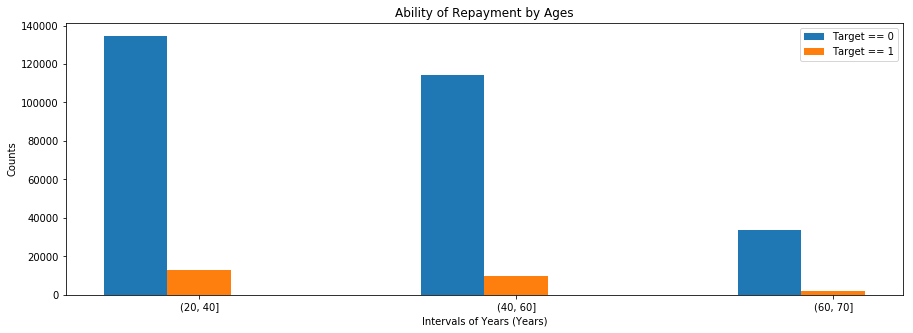

In [7]:
TARGET_1 = sub_df.loc[sub_df['TARGET'] == 1, 'GROUP'].value_counts()
print("Data type of TARGET_1: %s" %(type(TARGET_1)))
TARGET_0 = sub_df.loc[sub_df['TARGET'] == 0, 'GROUP'].value_counts()
print("Data type of TARGET_0: %s" %(type(TARGET_0)))

intervals = sub_df['GROUP'].unique().sort_values()
n_group = len(intervals)
index = np.arange(n_group)

barWidth = 0.2

plt.figure(figsize=(15,5))
plt.bar(index, TARGET_0.values, barWidth, label = 'Target == 0')
plt.bar(index+barWidth, TARGET_1.values, barWidth, label = 'Target == 1')
plt.xlabel('Intervals of Years (Years)')
plt.ylabel('Counts')
plt.xticks(index+barWidth, np.array(intervals,dtype = str))
plt.legend()
plt.title('Ability of Repayment by Ages')
plt.show()

In [8]:
# To find Percentage of Target 1 in each group
TARGET_TOTAL = TARGET_1 + TARGET_0

print("The percentage of people who can't repay timely in [20,40] is %.2f%%, which is %d" %((TARGET_1[0]/TARGET_TOTAL[0]), TARGET_1[0]))
print("The percentage of people who can't repay timely in [40,60] is %.2f%%, which is %d" %((TARGET_1[1]/TARGET_TOTAL[1]), TARGET_1[1]))
print("The percentage of people who can't repay timely in [60,70] is %.2f%%, which is %d" %((TARGET_1[2]/TARGET_TOTAL[2]), TARGET_1[2]))

The percentage of people who can't repay timely in [20,40] is 0.10%, which is 13046
The percentage of people who can't repay timely in [40,60] is 0.07%, which is 10028
The percentage of people who can't repay timely in [60,70] is 0.05%, which is 1751


**To sum up, the ability of repayment will increase while peole get aged.**